# Surface brightness profile of LSBs

In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib

Using matplotlib backend: Qt5Agg


## Giving the path

In [2]:
path = '/home/feli/Galaxias_LSBs_TFM/images/Datos/'

## Reading the data

In [3]:
LSBs_list = sorted(glob.glob(path+'*.dat'))

In [21]:
LSBs_raw_data = np.genfromtxt(LSBs_list[0], comments='#')[:,0:]

In [23]:
print(LSBs_list[0], 746 - 551, ' a las que sacar los datos')

/home/feli/Galaxias_LSBs_TFM/images/Datos/002.dat 195  a las que sacar los datos


In [20]:
fileList = []
fileList = sorted(glob.glob(path+'*.fits'))
hdulist = fits.open(fileList[1])#It has to be [0]!!!
#hdulist[1].header

IndexError: list index out of range

## This is the pixel scale

In [24]:
pscale = 0.396 #("/pix) from the SDSS data base

## Leo los datos con los que voy a operar

In [25]:
sma = LSBs_raw_data[:, 0] * pscale #Semi-major axis
flux = LSBs_raw_data[:, 1]

# Mis galaxias estan en 'r' por lo que tendré que usar l color integrado (g-r) para obtener g y pasar a Johnson

# B = g + 0.3130*(g - r) + 0.2271;  $\sigma$ = 0.0107

Para la LSB 002
muErr_g	0.01765876
muErr_r	0.04626679

## Longitud de escala del disco,  $h_z\propto\Big(\dfrac{R}{h}\Big)2\exp\Big(\dfrac{−R}{h}\Big)$

In [42]:
h_z = sma * 2. * np.exp(-sma)

## Graficos de flujo vs. radio galactocentrico y $\mu$ frente a R

In [32]:
fig,(ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.set_title('441')
ax0.errorbar(sma, flux, fmt='-o')
ax0.set_ylabel('Flux (ADU)')

mu = 30 - 2.5 * np.log10(flux) + 2.5 * np.log10(pscale**2)
#g = 18.11
#B = g + 0.3130*(g - r) + 0.2271#;  sigma = 0.0107
#mu = B

ax1.errorbar(sma, mu, fmt='-d')
#ax1.set_ylim((26, 16))
ax1.set_xlabel('Galactocentric distance (arcsec)')
ax1.set_ylabel('Surface Brightness (mag/arcsec$^2$)')

ax1.invert_yaxis()

plt.show()

## Ajuste lineal al disco para obtener la longitud de escala

In [69]:
rmin = 2.0
rmax = 9.5

m, b = np.polyfit(sma[(sma>rmin) & (sma<rmax)], mu[(sma>rmin) & (sma<rmax)], 1)
print('$\mu_0$ = ', b)
print('Pendiente = ', m)

$\mu_0$ =  20.509042906
Pendiente =  0.532853131079


In [73]:
xp = np.linspace(-2, 6, 100)
a = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)

plt.show()

NameError: name 'x' is not defined

In [64]:
fig,(ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.set_title('002, RA = 357.556, DEC = -0.782422')
ax0.errorbar(sma, flux, fmt='-o')
ax0.set_ylabel('Flux (ADU)')

mu = 30 - 2.5 * np.log10(flux) + 2.5 * np.log10(pscale**2)
#g = 18.11
#B = g + 0.3130*(g - r) + 0.2271#;  sigma = 0.0107
#mu = B

plt.title('Linear regression coefficents: m=%.3f, b=%.3f.' %(m,b))
ax1.errorbar(sma, mu, fmt='-d')
#ax1.set_ylim((26, 16))
ax1.set_xlabel('Galactocentric distance (arcsec)')
ax1.set_ylabel('Surf. Bright. (mag/arcsec$^2$)')

ax1.invert_yaxis()

plt.savefig(path+'/Analizadas/002.png')
plt.show()

In [75]:
fig,(ax1, ax2) = plt.subplots(nrows=2, sharex=False)
# Pintamos el brillo superficial
ax1.set_title('002, RA = 357.556, DEC = -0.782422')

mu = 30 - 2.5 * np.log10(flux) + 2.5 * np.log10(pscale**2)
#g = 18.11
#B = g + 0.3130*(g - r) + 0.2271#;  sigma = 0.0107
#mu = B

plt.title('Linear regression coefficents: m=%.3f, b=%.3f.' %(m,b))
ax1.errorbar(sma, mu, fmt='-d')
#ax1.set_ylim((26, 16))
ax1.set_ylabel('Surf. Bright. (mag/arcsec$^2$)')

ax1.invert_yaxis()

# Pinto el ajuste

ax2.set_xlabel('Galactocentric lenghtscale (arcsec)')
ax2.errorbar(m,b)

plt.savefig(path+'/Analizadas/ajuste_002.png')
plt.show()

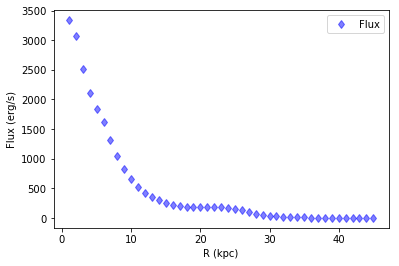

In [24]:
sma, flux, aux1, aux2  = np.loadtxt(path+"441.dat", unpack=True) #Llamo al archivo de texto que quiero pintar

plt.figure(1) #Empiezo una nueva figura
plt.plot(sma, flux, "bd", label="Flux", alpha=.5)  #Le digo lo que quiero que me pinte, "bo--" = blue "circle" con linea discontinua
#plt.plot(x, z, "r^:", label="cos", alpha=.5) #El "r^: me pone el color de este segundo plot"
#el alpha es la transparencia de los puntos que pinta, el color

#le ponemos las etiquetas al grafico
plt.xlabel("R (kpc)")
plt.ylabel("Flux (erg/s)")#como meto el formato LaTeX?
plt.legend()
plt.savefig('Flux_disk.eps')
plt.show() #Ahora le digo que me lo pinte